dont need to normalise the varibales 

## Model Creation: 

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import re

# Statistics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

# Sklearn - model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Sklearn - linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('Life_Expectancy_clean.csv')
# data.head()

In [3]:
# County_Ranked_(Yes1/No0) is causing an issue therefore rename:
data.rename(columns={'County_Ranked_(Yes1/No0)': 'County_Ranked'}, inplace=True)

<b>Drop the State Identification columns as they will exactly predict the life expectancy</b>

In [4]:
# Drop the  State_FIPS_Code & County_FIPS_Code
data.drop(columns=['State_FIPS_Code', 'County_FIPS_Code'], inplace=True)

## Set Target & Predictors

In [5]:
X_init = data.drop(columns=['Life_Expectancy'])
y_init = data['Life_Expectancy']

In [6]:
X_init.shape, y_init.shape

((2138, 54), (2138,))

## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=1000, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1138, 54), (1000, 54), (1138,), (1000,))

## Scaling

– Scale after train test split to avoid data leakage

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
# scale = MinMaxScaler()

# Scale Train
X_scaled_train = scale.fit_transform(X_train, y_train)
X_scaled_train = pd.DataFrame(X_scaled_train, columns=X_train.columns)

# Scale Test
X_scaled_test = scale.fit_transform(X_test, y_test)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_test.columns)

# Covert back for the rest of the document 
X_train = X_scaled_train
X_test = X_scaled_test

In [10]:
# # scale = StandardScaler()
# scale = MinMaxScaler()

# # Scale Train
# X_scaled_train = scale.fit_transform(X_train, y_train)
# X_scaled_train = pd.DataFrame(X_scaled_train, columns=X_train.columns)

# # Scale Test
# X_scaled_test = scale.fit_transform(X_test, y_test)
# X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_test.columns)

# # Covert back for the rest of the document 
# X_train = X_scaled_train
# X_test = X_scaled_test

In [11]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [12]:
# df_model = pd.concat([y_train,X_train], axis=1)
# df_model.head()

# Model 1:

- All variable carried forward from the cleaning

## K-fold / Cross Validation Model

In [13]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.9016229194751528


<b>Observations</b>

- Very High R^2 value -> similar to the stats module value
- Look to reduce variables

## Statsmodule OLS model

In [14]:
X_const_train = sm.add_constant(X_train)

model = sm.OLS(y_train.values, X_const_train).fit()
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     235.9
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:12:52   Log-Likelihood:                -1430.3
No. Observations:                1138   AIC:                             2971.
Df Residuals:                    1083   BIC:                             3248.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.3917      0.026   2994.988      0.000      77.341      77.442
Premature_death_raw_value                                      -0.4183      0.117     -3.576      0.000      -0.648      -0.189
Poor_or_fair_health_raw_value                                   0.2453      0.121      2.023      0.043       0.007       0.483
Poor_physical_health_days_raw_value                            -0.4989      0.304     -1.643      0.101      -1.095       0.097
Poor_mental_health_days_raw_value                               0.0091      0.185      0.049      0.961      -0.354       0.372
Low_birthweight_raw_value                                      -0.0181      0.045     -0.399      0.690      -0.107       0.071
Adult_smoking_raw_value                                         0.0611      0.074      0.820      0.412      -0.085       0.207
Adult_obesity_raw_value                                        -0.0281      0.045     -0.628      0.530      -0.116       0.060
Food_environment_index_raw_value                               -0.7239      0.529     -1.368      0.172      -1.762       0.314
Physical_inactivity_raw_value                                  -0.0224      0.053     -0.425      0.671      -0.126       0.081
Access_to_exercise_opportunities_raw_value                     -0.0193      0.039     -0.490      0.624      -0.097       0.058
Excessive_drinking_raw_value                                   -0.0524      0.051     -1.030      0.303      -0.152       0.047
Alcohol_impaired_driving_deaths_raw_value                       0.0120      0.028      0.432      0.666      -0.042       0.066
Sexually_transmitted_infections_raw_value                       0.0466      0.040      1.172      0.242      -0.031       0.125
Teen_births_raw_value                                           0.0577      0.059      0.983      0.326      -0.057       0.173
Uninsured_raw_value                                             2.1628      0.650      3.327      0.001       0.887       3.439
Primary_care_physicians_raw_value                              -0.0685      0.042     -1.650      0.099      -0.150       0.013
Dentists_raw_value                                              0.0226      0.037      0.607      0.544      -0.050       0.095
Mental_health_providers_raw_value                              -0.0134      0.033     -0.401      0.689      -0.079       0.052
Preventable_hospital_stays_raw_value                           -0.0046      0.034     -0.132      0.895      -0.072       0.063
Mammography_screening_raw_value                                -0.0094      0.041     -0.231      0.817      -0.089       0.070
Flu_vaccina

<b>Observations</b>

- High R^2 value
- High AIC & BIC Values as lots of features

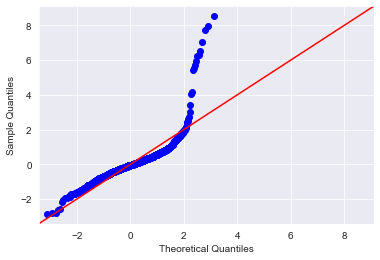

In [15]:
model_qqplot = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [16]:
# q=0.9

# y_train = pd.DataFrame(y_train.values)

# # Set the index to q range
# drop_index_train=y_train[y_train > y_train.quantile(q)].index
# # drop_index_test=y_test[y_test > y_test.quantile(q)].index

# # Apply to Train
# X_train = X_train.drop(index = drop_index_train)
# y_train = y_train[y_train <= y_train.quantile(q)]

# # Apply to Test
# # X_test = X_test.drop(index = drop_index_test)
# # y_test = y_test[y_test <= y_test.quantile(q)]

# # Stats OLS Model
# X_const_train = sm.add_constant(X_train)
# model_qq = sm.OLS(y_train.values, X_const_train).fit()
# model_qq.summary()



<b>Old</b>

Skew:	3.076	
Kurtosis:	23.230

<b>New</b>

Skew:	1.238	
Kurtosis:	11.732	

In [17]:
# model_qqplot = sm.graphics.qqplot(model_qq.resid, dist=stats.norm, line='45', fit=True)

## Drop Columns on Non-Statistical Evaluation  
<b>Ease of collection</b>
- Has to be a value which is identifiable to the person? i.e Man

<b>Quantifiability</b>
- asd


<b>Cost of Collection</b>
- asdf

In [18]:
# X_cols = list(X.columns)
# for x in X_cols:
#     print(x)

In [19]:
# Drop max
drop = ['Premature_death_raw_value', 
        'Premature_age_adjusted_mortality_raw_value',
        'Poor_or_fair_health_raw_value', 
        'Poor_physical_health_days_raw_value', 
        'Poor_mental_health_days_raw_value', 
        'Adult_smoking_raw_value', 
        'Physical_inactivity_raw_value', 
        'Excessive_drinking_raw_value',
        'Preventable_hospital_stays_raw_value', 
        'Mammography_screening_raw_value', 
        'Driving_alone_to_work_raw_value',
        'Long_commute___driving_alone_raw_value', 
        'Frequent_physical_distress_raw_value', 
        'Frequent_mental_distress_raw_value',
        'Insufficient_sleep_raw_value',
        'Other_primary_care_providers_raw_value',
        'Drinking_water_violations_raw_value']
len(drop)

17

In [20]:
# # Drop Hard to measure
# drop = ['Premature_age_adjusted_mortality_raw_value', 
#         'Premature_death_raw_value', 
#         'Poor_or_fair_health_raw_value', 
#         'Poor_physical_health_days_raw_value', 
#         'Poor_mental_health_days_raw_value']
# len(drop)

In [21]:
cols = list(X_train.columns)
new_cols = [x for x in cols if x not in drop]

In [22]:
X_1 = X_train[new_cols]
len(X_train.columns) , len(X_1.columns)

(54, 37)

In [23]:
# Run if wish to check all variables
# X_1 = X.copy()

# Model 2:

In [24]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_1, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.7231944043028725


In [25]:
X_const = sm.add_constant(X_1)

model1 = sm.OLS(y_train.values, X_const).fit()
model1.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     89.93
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.32e-302
Time:                        14:12:52   Log-Likelihood:                -2086.9
No. Observations:                1138   AIC:                             4250.
Df Residuals:                    1100   BIC:                             4441.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.3917      0.046   1695.074      0.000      77.302      77.481
Low_birthweight_raw_value                                       0.0252      0.073      0.347      0.729      -0.117       0.168
Adult_obesity_raw_value                                        -0.1884      0.072     -2.635      0.009      -0.329      -0.048
Food_environment_index_raw_value                               -0.0948      0.928     -0.102      0.919      -1.916       1.727
Access_to_exercise_opportunities_raw_value                     -0.0127      0.066     -0.191      0.849      -0.143       0.118
Alcohol_impaired_driving_deaths_raw_value                       0.0681      0.048      1.424      0.155      -0.026       0.162
Sexually_transmitted_infections_raw_value                      -0.1185      0.068     -1.743      0.082      -0.252       0.015
Teen_births_raw_value                                          -0.7017      0.094     -7.460      0.000      -0.886      -0.517
Uninsured_raw_value                                             4.4635      1.077      4.144      0.000       2.350       6.577
Primary_care_physicians_raw_value                               0.0774      0.062      1.252      0.211      -0.044       0.199
Dentists_raw_value                                              0.0094      0.064      0.146      0.884      -0.117       0.135
Mental_health_providers_raw_value                              -0.1473      0.057     -2.589      0.010      -0.259      -0.036
Flu_vaccinations_raw_value                                     -0.0652      0.061     -1.072      0.284      -0.185       0.054
High_school_graduation_raw_value                               -0.1110      0.056     -1.987      0.047      -0.221      -0.001
Some_college_raw_value                                          0.0257      0.080      0.320      0.749      -0.132       0.183
Unemployment_raw_value                                          0.1697      0.073      2.310      0.021       0.026       0.314
Children_in_poverty_raw_value                                  -0.1136      0.124     -0.917      0.359      -0.357       0.129
Income_inequality_raw_value                                     0.0331      0.064      0.519      0.604      -0.092       0.158
Children_in_single_parent_households_raw_value                 -0.1493      0.080     -1.862      0.063      -0.307       0.008
Social_associations_raw_value                                  -0.0407      0.058     -0.700      0.484      -0.155       0.073
Violent_crime_raw_value                                        -0.0944      0.058     -1.633      0.103      -0.208       0.019
Injury_deat

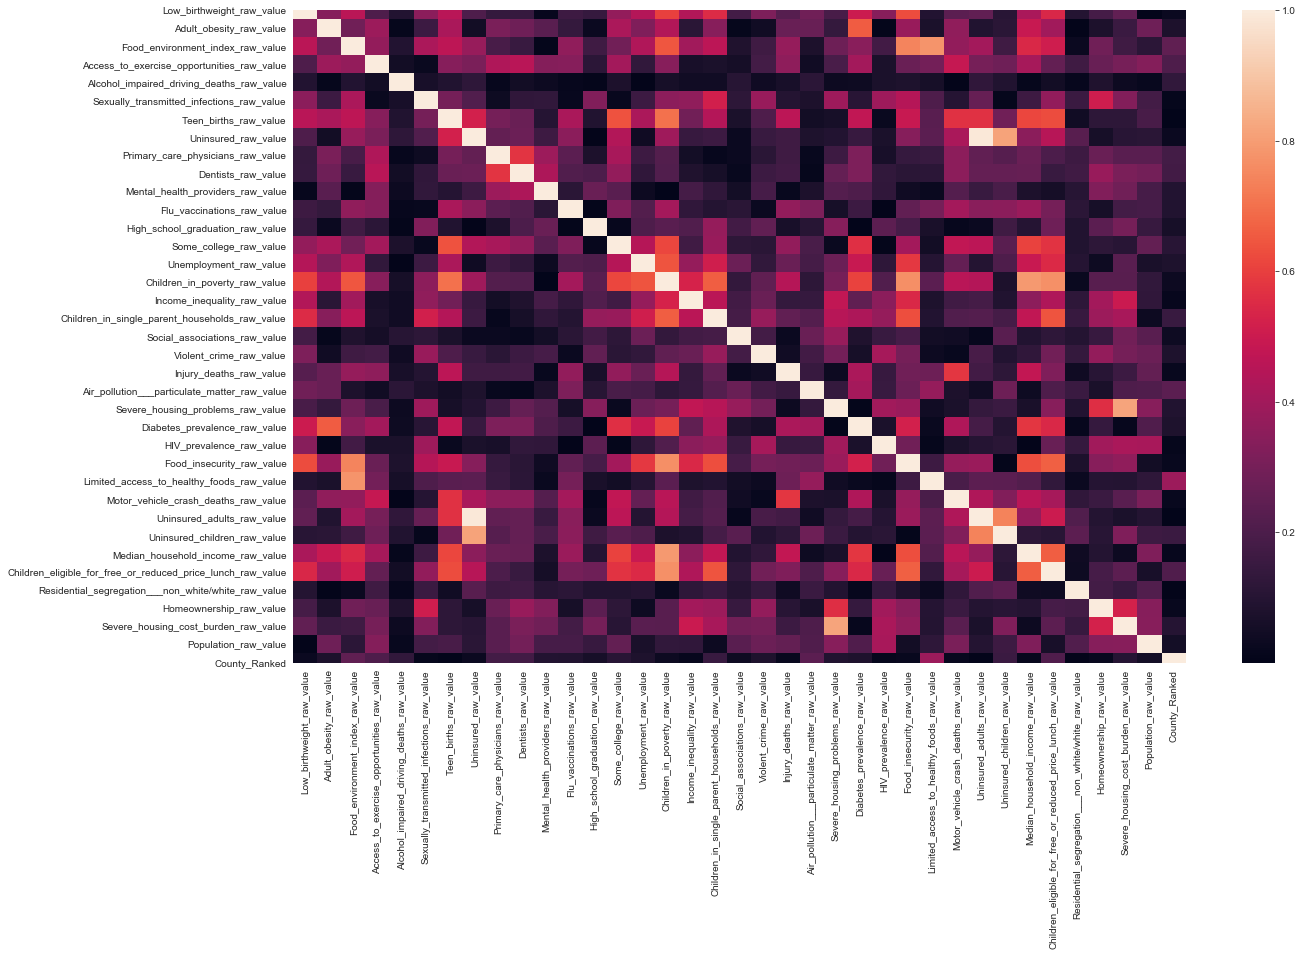

In [97]:
corr = abs(X_1.corr())
plt.figure(figsize=(20,12))
sns.heatmap(corr)

## Eliminate Features using the P-value score

In [26]:
def func_rfe(X_1, model):
    X_cols = list(X_1.columns)
    X_cols = ['const'] + X_cols
    rfe = list(zip(X_cols, model.pvalues))
    rfe = pd.DataFrame(rfe, columns=['Parameters', 'P_values'])
    rfe.sort_values(by='P_values', ascending=True, inplace=True)
    rfe_reduced = rfe.loc[rfe['P_values'] < 0.05]
    return rfe_reduced

In [27]:
rfe_reduced = func_rfe(X_1, model1)
rfe_reduced

,Parameters,P_values
0,const,0.000000e+00
21,Injury_deaths_raw_value,8.624577e-48
7,Teen_births_raw_value,1.749488e-13
22,Air_pollution___particulate_matter_raw_value,1.593672e-08
24,Diabetes_prevalence_raw_value,4.275516e-07
29,Uninsured_adults_raw_value,2.203541e-05
8,Uninsured_raw_value,3.679453e-05
37,County_Ranked,2.856908e-04
2,Adult_obesity_raw_value,8.523400e-03
11,Mental_health_providers_raw_value,9.759862e-03


In [28]:
rfe_reduced = rfe_reduced.loc[rfe_reduced['Parameters'] != 'const']
X_cols = list(rfe_reduced.Parameters)
X_2 = X_1[X_cols]
# X_2.sort_index()

In [29]:
X_1.shape[1], X_2.shape[1]

(37, 14)

# Model 3:

In [30]:
X_const = sm.add_constant(X_2)

model2 = sm.OLS(y_train.values, X_const).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     199.4
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.90e-292
Time:                        14:12:52   Log-Likelihood:                -2168.8
No. Observations:                1138   AIC:                             4368.
Df Residuals:                    1123   BIC:                             4443.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           77.3917      0.049   1593.842      0.000      77.296      77.487
Injury_deaths_raw_value                         -1.0666      0.068    -15.719      0.000      -1.200      -0.933
Teen_births_raw_value                           -0.8090      0.079    -10.197      0.000      -0.965      -0.653
Air_pollution___particulate_matter_raw_value    -0.6335      0.063     -9.983      0.000      -0.758      -0.509
Diabetes_prevalence_raw_value                   -0.5180      0.083     -6.216      0.000      -0.681      -0.354
Uninsured_adults_raw_value                      -2.9904      0.455     -6.571      0.000      -3.883      -2.097
Uninsured_raw_value                              2.9904      0.445      6.718      0.000       2.117       3.864
County_Ranked                                    0.1800      0.052      3.480      0.001       0.079       0.281
Adult_obesity_raw_value                         -0.2599      0.070     -3.700      0.000      -0.398      -0.122
Mental_health_providers_raw_value               -0.2221      0.054     -4.079      0.000      -0.329      -0.115
Population_raw_value                             0.2068      0.060      3.425      0.001       0.088       0.325
Motor_vehicle_crash_deaths_raw_value            -0.2006      0.071     -2.814      0.005      -0.341      -0.061
Unemployment_raw_value                          -0.1075      0.062     -1.743      0.082      -0.228       0.014
HIV_prevalence_raw_value                        -0.0727      0.057     -1.267      0.205      -0.185       0.040
High_school_graduation_raw_value                -0.0142      0.055     -0.259      0.796      -0.122       0.094
==============================================================================
Omnibus:                      354.998   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3534.511
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                      11.327   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adjust Baseline & Run RFE

In [31]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_2, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.7013839662329098


In [32]:
rfe_red2 = func_rfe(X_2, model2)
rfe_red2

,Parameters,P_values
0,const,0.000000e+00
1,Injury_deaths_raw_value,1.791424e-50
2,Teen_births_raw_value,2.068229e-23
3,Air_pollution___particulate_matter_raw_value,1.528202e-22
6,Uninsured_raw_value,2.912582e-11
5,Uninsured_adults_raw_value,7.618484e-11
4,Diabetes_prevalence_raw_value,7.162435e-10
9,Mental_health_providers_raw_value,4.852094e-05
8,Adult_obesity_raw_value,2.262093e-04
7,County_Ranked,5.208372e-04


In [33]:
rfe_red2 = rfe_red2.loc[rfe_red2['Parameters'] != 'const']
X_cols = list(rfe_red2.Parameters)
X_3 = X_2[X_cols]
# X_3.sort_index()

In [34]:
X_2.shape[1], X_3.shape[1]

(14, 11)

In [35]:
X_const = sm.add_constant(X_3)

model3 = sm.OLS(y_train.values, X_const).fit()
model3.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     252.9
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          5.67e-295
Time:                        14:12:52   Log-Likelihood:                -2171.3
No. Observations:                1138   AIC:                             4367.
Df Residuals:                    1126   BIC:                             4427.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           77.3917      0.049   1592.520      0.000      77.296      77.487
Injury_deaths_raw_value                         -1.0523      0.067    -15.691      0.000      -1.184      -0.921
Teen_births_raw_value                           -0.8324      0.077    -10.747      0.000      -0.984      -0.680
Air_pollution___particulate_matter_raw_value    -0.6299      0.062    -10.107      0.000      -0.752      -0.508
Uninsured_raw_value                              3.2353      0.420      7.695      0.000       2.410       4.060
Uninsured_adults_raw_value                      -3.2307      0.431     -7.494      0.000      -4.077      -2.385
Diabetes_prevalence_raw_value                   -0.5779      0.079     -7.346      0.000      -0.732      -0.424
Mental_health_providers_raw_value               -0.2363      0.053     -4.478      0.000      -0.340      -0.133
Adult_obesity_raw_value                         -0.2485      0.070     -3.561      0.000      -0.385      -0.112
County_Ranked                                    0.1868      0.051      3.630      0.000       0.086       0.288
Population_raw_value                             0.1793      0.056      3.229      0.001       0.070       0.288
Motor_vehicle_crash_deaths_raw_value            -0.2079      0.071     -2.920      0.004      -0.348      -0.068
==============================================================================
Omnibus:                      342.504   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3287.168
Skew:                           1.101   Prob(JB):                         0.00
Kurtosis:                      11.030   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

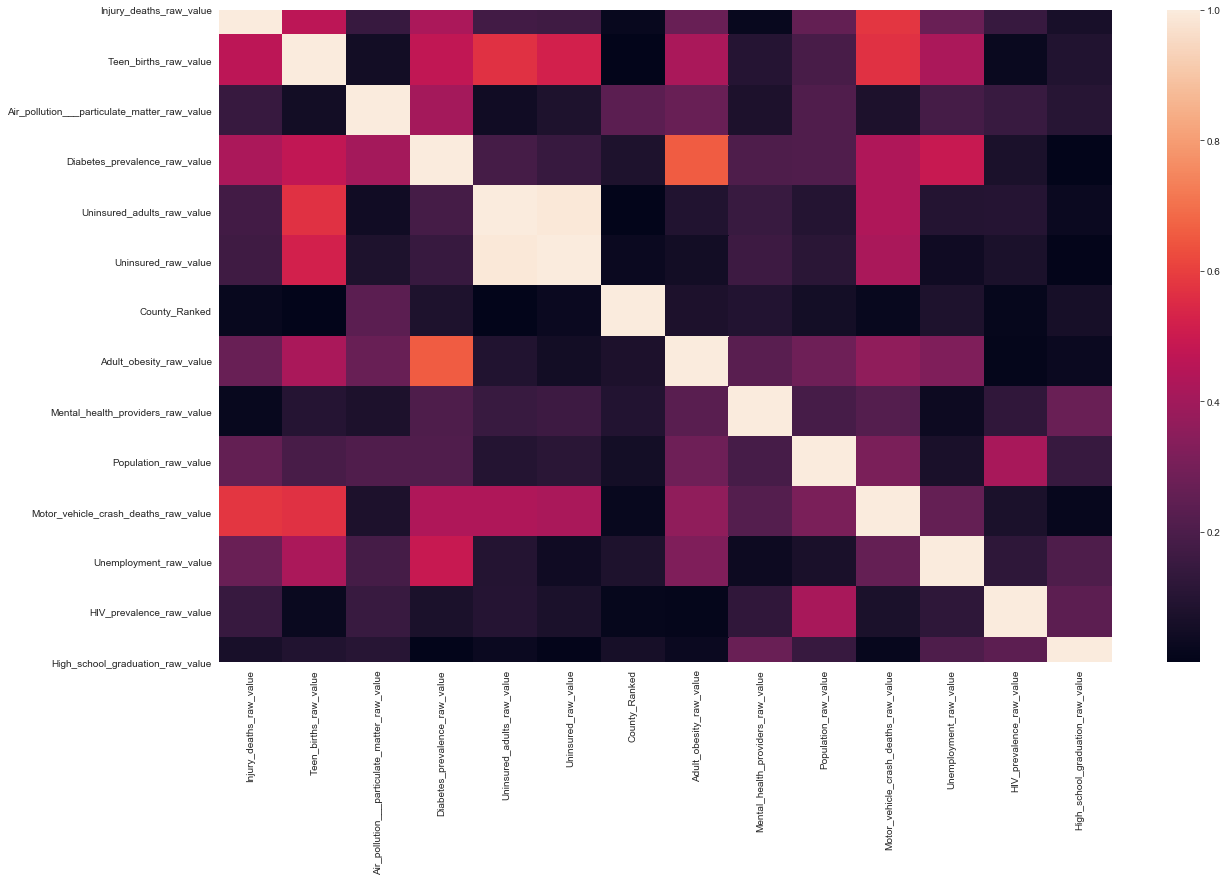

In [99]:
corr = abs(X_2.corr())
plt.figure(figsize=(20,12))
sns.heatmap(corr)

# Interactions 

In [36]:
def feature_combinations_r_sqrd_with_Inter_df(X, y, X_test, num_feat_comb=2):
    # Requires cals: baseline & crossvalidation
    
    # Create Regression & Combinations
    from itertools import combinations
    combinations = list(combinations(list(X.columns), num_feat_comb))
    
    # Create cross-validation & output a bassline MSE score as a DataFrame
    comb_scores = []
    inter_cols = []
    inter_score = []
    inter_score_test = []
    data = X.copy()
    data_test = X_test.copy()
    
    for comb in combinations:
        data['interaction'] = data[comb[0]] * data[comb[1]]
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: 
            comb_scores.append(round(score,3))
            inter_cols.append((str(comb[0]) + '_AND_' + str(comb[1])))
            inter_score.append(data[comb[0]] * data[comb[1]])
            inter_score_test.append(data_test[comb[0]] * data_test[comb[1]])
    
    # Train Data - # Change this to this in the future: (data=[[inter_cols, comb_scores]]) to avoid .T
    df_base = pd.DataFrame(data=[inter_cols, comb_scores]) 
    df_base = df_base.T  
    df_base.rename(columns={0: "Interaction", 1: "CV_score"}, inplace=True)
    df_base.sort_values(by='CV_score', inplace = True, ascending=False )
    df_base.reset_index(drop=True, inplace = True)
    
    df_interactions_scores = pd.DataFrame(data=inter_score , index=inter_cols)
    df_interactions_scores = df_interactions_scores.T
    
    # Test Data    
    df_interactions_scores_test = pd.DataFrame(data=inter_score_test , index=inter_cols)
    df_interactions_scores_test = df_interactions_scores_test.T

    return df_base , df_interactions_scores, df_interactions_scores_test

In [37]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_3, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.701463552214723


In [38]:
X_cols = list(X_3.columns)
X_3_test = X_test[X_cols]

In [39]:
all(X_3.columns == X_3_test.columns)

True

In [40]:
df_inter, df_score, df_score_test = feature_combinations_r_sqrd_with_Inter_df(X_3, y_train, X_test=X_3_test)

In [41]:
df_inter.head(20)

,Interaction,CV_score
0,Teen_births_raw_value_AND_Uninsured_raw_value,0.709
1,Teen_births_raw_value_AND_Uninsured_adults_raw...,0.709
2,County_Ranked_AND_Population_raw_value,0.706
3,Injury_deaths_raw_value_AND_County_Ranked,0.705
4,Uninsured_raw_value_AND_Uninsured_adults_raw_v...,0.705
5,Injury_deaths_raw_value_AND_Teen_births_raw_value,0.703
6,Teen_births_raw_value_AND_Population_raw_value,0.702
7,Mental_health_providers_raw_value_AND_Motor_ve...,0.702
8,Mental_health_providers_raw_value_AND_Adult_ob...,0.702
9,Teen_births_raw_value_AND_Diabetes_prevalence_...,0.702


In [42]:
def add_interaction_feature(data, df_inter, df_score, num_inter):
    i=0
    
    while i < num_inter:
        col = df_inter['Interaction'][i]
  
        data[col] = df_score[col]
        i+=1
    
    return data

In [43]:
data_combined = add_interaction_feature(X_3, df_inter, df_score, 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
data_combined_test = add_interaction_feature(X_3_test, df_inter, df_score_test, 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Run Interaction Model 

In [45]:
X_const = sm.add_constant(data_combined)

model_inter = sm.OLS(y_train.values, X_const).fit()
model_inter.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     149.3
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          4.47e-306
Time:                        14:12:55   Log-Likelihood:                -2118.1
No. Observations:                1138   AIC:                             4280.
Df Residuals:                    1116   BIC:                             4391.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                         84.0726      1.541     54.560      0.000      81.049      87.096
Injury_deaths_raw_value                                                       -0.9963      0.068    -14.621      0.000      -1.130      -0.863
Teen_births_raw_value                                                         -0.9497      0.078    -12.233      0.000      -1.102      -0.797
Air_pollution___particulate_matter_raw_value                                  -0.5947      0.061     -9.716      0.000      -0.715      -0.475
Uninsured_raw_value                                                            3.7418      0.491      7.615      0.000       2.778       4.706
Uninsured_adults_raw_value                                                    -3.9420      0.498     -7.912      0.000      -4.920      -2.964
Diabetes_prevalence_raw_value                                                 -0.5151      0.079     -6.541      0.000      -0.670      -0.361
Mental_health_providers_raw_value                                             -0.2516      0.055     -4.576      0.000      -0.359      -0.144
Adult_obesity_raw_value                                                       -0.1890      0.070     -2.715      0.007      -0.326      -0.052
County_Ranked                                                                -46.4080     10.489     -4.424      0.000     -66.988     -25.828
Population_raw_value                                                          18.9206      4.215      4.489      0.000      10.650      27.191
Motor_vehicle_crash_deaths_raw_value                                          -0.0997      0.072     -1.389      0.165      -0.240       0.041
Teen_births_raw_value_AND_Uninsured_raw_value                                 -0.4392      0.304     -1.445      0.149      -1.035       0.157
Teen_births_raw_value_AND_Uninsured_adults_raw_value                           0.7074      0.295      2.398      0.017       0.129       1.286
County_Ranked_AND_Population_raw_value                                      -127.5609     28.716     -4.442      0.000    -183.904     -71.218
Injury_deaths_raw_value_AND_County_Ranked                                     -0.1222      0.035     -3.513      0.000      -0.191      -0.054
Uninsured_raw_value_AND_Uninsured_adults_raw_value                             0.0603      0.048      1.265      0.206      -0.033       0.154
Injury_deaths_raw_value_AND_Teen_births_raw_value                             -0.1907      0.044     -4.298      0.000      -0.278      -0.104
Teen_births_raw_value_AND_Population_raw_value                                -0

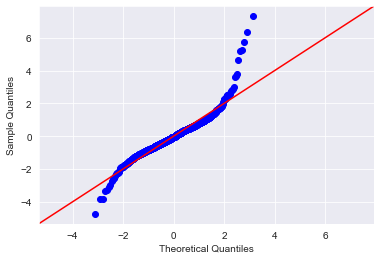

In [46]:
model_qqplot = sm.graphics.qqplot(model_inter.resid, dist=stats.norm, line='45', fit=True)

## RFE on Interactions Model

In [47]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, data_combined, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: -8.680678347735569


In [48]:
df_inter_rfe = func_rfe(data_combined, model_inter)
df_inter_rfe

,Parameters,P_values
0,const,3.414970e-317
1,Injury_deaths_raw_value,2.001068e-44
2,Teen_births_raw_value,2.220032e-32
3,Air_pollution___particulate_matter_raw_value,1.782571e-21
5,Uninsured_adults_raw_value,6.088344e-15
4,Uninsured_raw_value,5.600794e-14
6,Diabetes_prevalence_raw_value,9.306409e-11
7,Mental_health_providers_raw_value,5.260537e-06
10,Population_raw_value,7.909141e-06
14,County_Ranked_AND_Population_raw_value,9.789400e-06


In [49]:
rfe_red_inter = df_inter_rfe.loc[df_inter_rfe['Parameters'] != 'const']
X_cols = list(rfe_red_inter.Parameters)
df_inter_reduced = data_combined[X_cols]
# X_3.sort_index()

In [50]:
X_const = sm.add_constant(df_inter_reduced)

model_inter_red = sm.OLS(y_train.values, X_const).fit()
model_inter_red.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          3.75e-310
Time:                        14:12:55   Log-Likelihood:                -2121.8
No. Observations:                1138   AIC:                             4278.
Df Residuals:                    1121   BIC:                             4363.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                         84.0369      1.542     54.505      0.000      81.012      87.062
Injury_deaths_raw_value                                                       -1.0347      0.064    -16.227      0.000      -1.160      -0.910
Teen_births_raw_value                                                         -0.9445      0.074    -12.681      0.000      -1.091      -0.798
Air_pollution___particulate_matter_raw_value                                  -0.5858      0.060     -9.689      0.000      -0.704      -0.467
Uninsured_adults_raw_value                                                    -3.8313      0.455     -8.418      0.000      -4.724      -2.938
Uninsured_raw_value                                                            3.6325      0.439      8.267      0.000       2.770       4.495
Diabetes_prevalence_raw_value                                                 -0.5072      0.077     -6.549      0.000      -0.659      -0.355
Mental_health_providers_raw_value                                             -0.2385      0.054     -4.421      0.000      -0.344      -0.133
Population_raw_value                                                          18.7152      4.218      4.437      0.000      10.439      26.991
County_Ranked_AND_Population_raw_value                                      -125.8970     28.733     -4.382      0.000    -182.274     -69.520
County_Ranked                                                                -45.8051     10.495     -4.364      0.000     -66.398     -25.212
Injury_deaths_raw_value_AND_Teen_births_raw_value                             -0.1689      0.034     -4.915      0.000      -0.236      -0.101
Injury_deaths_raw_value_AND_County_Ranked                                     -0.1294      0.035     -3.741      0.000      -0.197      -0.062
Mental_health_providers_raw_value_AND_Motor_vehicle_crash_deaths_raw_value     0.1554      0.049      3.203      0.001       0.060       0.251
Adult_obesity_raw_value                                                       -0.2137      0.068     -3.123      0.002      -0.348      -0.079
Teen_births_raw_value_AND_Uninsured_adults_raw_value                           0.3411      0.047      7.221      0.000       0.248       0.434
Mental_health_providers_raw_value_AND_Adult_obesity_raw_value                 -0.0894      0.039     -2.295      0.022      -0.166      -0.013
==============================================================================
Omnibus:                      313.518   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        

# Polynomial Parameters

In [51]:
# from sklearn.preprocessing import PolynomialFeatures

# regression = LinearRegression()
# crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# polynomials = []
# for col in X.columns:
#     for degree in [2, 3, 4]:
#         data = X.copy()
#         poly = PolynomialFeatures(degree, include_bias=False)
#         X_transformed = poly.fit_transform(X[[col]])
#         data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
#         score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
#         if score > baseline: polynomials.append((col, degree, round(score, 3)))
# print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

In [52]:
# polynom = pd.DataFrame(polynomials)
# polynom.groupby([0], sort=False)[2].max()

# Full model R-squared  

In [53]:
full_model = np.mean(cross_val_score(regression, data_combined, y_train, scoring='r2', cv=crossvalidation))
print("Full model R^2:", full_model)

Full model R^2: -8.680678347735569


# Lasso

In [54]:
X_final = data_combined

## AIC & BIC Alpha Selection using Lasso

In [55]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

In [56]:
def aic_criterion(X_trian, y_train):
    model_aic = LassoLarsIC(criterion='aic')
    model_aic.fit(X_trian, y_train)
    alpha_aic_ = model_aic.alpha_
    print("Alpha_AIC", alpha_aic_) 
    return model_aic, alpha_aic_

In [57]:
def bic_criterion(X_trian, y_train):
    model_bic = LassoLarsIC(criterion='bic')
    model_bic.fit(X_trian, y_train)
    alpha_bic_ = model_bic.alpha_
    print("Alpha_BIC", alpha_bic_)
    return model_bic, alpha_bic_

In [58]:
def plot_ic_criterion(model_aic, model_bic):
    plt.figure()
    
    # AIC
    alpha_ = model_aic.alpha_
    alphas_ = model_aic.alphas_
    criterion_ = model_aic.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color='green', linewidth=2, label= 'AIC')
    plt.axvline(-np.log10(alpha_), color='green', linewidth=2,
                label='alpha for %s AIC')
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
    # BIC
    alpha_ = model_bic.alpha_
    alphas_ = model_bic.alphas_
    criterion_ = model_bic.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color='blue', linewidth=2, label= 'BIC')
    plt.axvline(-np.log10(alpha_), color='blue', linewidth=2,
                label='alpha for %s BIC')
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
    plt.legend()
    plt.title('Information-criterion for model selection')
    plt.show();

In [59]:
def ic_all(X_trian, y_train):
    model_aic , alpha_aic_ = aic_criterion(X_trian, y_train)
    model_bic , alpha_bic_ = bic_criterion(X_trian, y_train)
    plot_ic_criterion(model_aic, model_bic)
    return alpha_aic_ , alpha_bic_

Alpha_AIC 0.0028248803784270324
Alpha_BIC 0.0071522744117400935


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


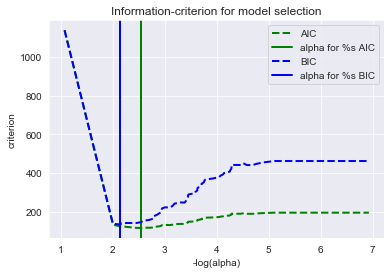

In [60]:
AIC_1, BIC_1 = ic_all(X_train, y_train)

## Validations Against  Test Data

In [61]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [62]:
def lasso_reg_validation(X_train, y_train, X_test, y_test, lasso_alpha=1):
    # Lasso R2 & MSE
    lasso = Lasso(lasso_alpha)
    lasso.fit(X_train, y_train)
    
    r2_train = lasso.score(X_train, y_train)
    r2_test = lasso.score(X_test, y_test)
    
    mse_train = mean_squared_error(y_train, lasso.predict(X_train))
    mse_test = mean_squared_error(y_test, lasso.predict(X_test))
    
#     print("Lasso Reression")
#     print("----------------------------------------")
#     print('Training r^2:', lasso.score(X_train, y_train))
#     print('Test r^2:', lasso.score(X_test, y_test))
#     print("----------------------------------------")
#     print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
#     print('Test MSE:', mean_squared_error(y_test, lasso.predict(X_test)))
    
    return round(r2_train,3), round(r2_test,3), round(mse_train,3), round(mse_test,3)

In [63]:
def ridge_reg_validation(X_train, y_train, X_test, y_test, ridge_alpha=1):
    # Ridge Regression
    ridge = Ridge(ridge_alpha)
    ridge.fit(X_train, y_train)
    
    r2_train = ridge.score(X_train, y_train)
    r2_test = ridge.score(X_test, y_test)
    
    mse_train = mean_squared_error(y_train, ridge.predict(X_train))
    mse_test = mean_squared_error(y_test, ridge.predict(X_test))
    
#     print("Ridge Reression")
#     print("----------------------------------------")
#     print('Training r^2:', ridge.score(X_train, y_train))
#     print('Test r^2:', ridge.score(X_test, y_test))
#     print("----------------------------------------")
#     print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
#     print('Test MSE:', mean_squared_error(y_test, ridge.predict(X_test)))
    
    return round(r2_train,3), round(r2_test,3), round(mse_train,3), round(mse_test,3)

In [64]:
def linear_model_validation(X_train, y_train, X_test, y_test):
    # Linear Reg R2 and MSE
    linreg_all = LinearRegression()
    linreg_all.fit(X_train, y_train)  
    
    r2_train = linreg_all.score(X_train, y_train)
    r2_test = linreg_all.score(X_test, y_test)
    
    mse_train = mean_squared_error(y_train, linreg_all.predict(X_train))
    mse_test = mean_squared_error(y_test, linreg_all.predict(X_test))
    
    
#     print("Linear Regression:")
#     print("----------------------------------------")
#     print('Training r^2:', linreg_all.score(X_train, y_train))
#     print('Test r^2:', linreg_all.score(X_test, y_test))
#     print("----------------------------------------")
#     print('Training MSE:', mean_squared_error(y_train, linreg_all.predict(X_train)))
#     print('Test MSE:', mean_squared_error(y_test, linreg_all.predict(X_test)))
    
    return round(r2_train,3), round(r2_test,3), round(mse_train,3), round(mse_test,3)

In [65]:
# def All_Model_validations(X_train, y_train, X_test, y_test, lasso_alpha=1, ridge_alpha=1):
#     lasso_reg_validation(X_train, y_train, X_test, y_test, lasso_alpha)
#     print("========================================\n")
#     ridge_reg_validation(X_train, y_train, X_test, y_test, ridge_alpha)
#     print("========================================\n")
#     linear_model_validation(X_train, y_train, X_test, y_test)

In [66]:
def model_DataFrame(model_name, X_train, y_train, X_test, y_test, lasso_alpha=1, ridge_alpha=1):
    
    lasso_r2_train, lasso_r2_test, lasso_mse_train, lasso_mse_test = lasso_reg_validation(X_train, y_train, X_test, y_test, lasso_alpha)

    ridge_r2_train, ridge_r2_test, ridge_mse_train, ridge_mse_test = ridge_reg_validation(X_train, y_train, X_test, y_test, ridge_alpha)

    linear_r2_train, linear_r2_test, linear_mse_train, linear_mse_test = linear_model_validation(X_train, y_train, X_test, y_test)
    
    df_validation = pd.DataFrame([[model_name, 
                                   lasso_alpha, lasso_r2_train, lasso_r2_test, lasso_mse_train, lasso_mse_test, 
                                  ridge_alpha, ridge_r2_train, ridge_r2_test, ridge_mse_train, ridge_mse_test, 
                                  linear_r2_train, linear_r2_test, linear_mse_train, linear_mse_test]],
                                columns=['model_name',
                                         'lasso_alpha', 'lasso_r2_train', 'lasso_r2_test', 'lasso_mse_train', 'lasso_mse_test', 
                                  'ridge_alpha', 'ridge_r2_train', 'ridge_r2_test', 'ridge_mse_train', 'ridge_mse_test', 
                                  'linear_r2_train', 'linear_r2_test', 'linear_mse_train', 'linear_mse_test'])
    df_validation.set_index('model_name', inplace=True)
    df_validation = df_validation.T
    
    return df_validation

### Baseline model validation

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha_AIC 0.0028248803784270324
Alpha_BIC 0.0071522744117400935


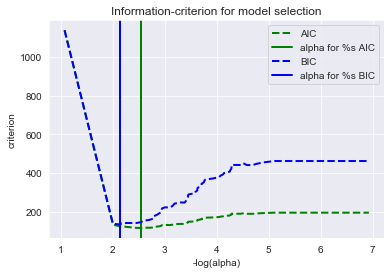

In [67]:
AIC_1, BIC_1 = ic_all(X_train, y_train)

In [68]:
df_1 = model_DataFrame('Baseline', X_train, y_train , X_test, y_test, lasso_alpha=AIC_1, ridge_alpha=BIC_1)
# df_1

### After the Baseline Drops Validations

In [69]:
X_cols = list(X_1.columns)
X_1_test = X_test[X_cols]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


Alpha_AIC 0.0022635778737899346
Alpha_BIC 0.005096031205437764


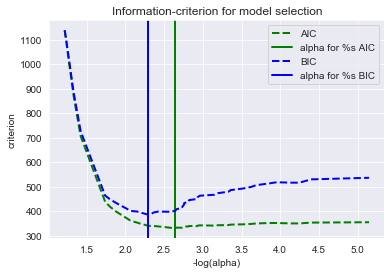

In [70]:
AIC_2, BIC_2 = ic_all(X_1, y_train)

In [71]:
df_2 = model_DataFrame('Initial_Drop',X_1, y_train , X_1_test, y_test, lasso_alpha=AIC_2, ridge_alpha=BIC_2)
# df_2

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.72505242731495, tolerance: 1.0502947366859894
  positive)


### RFE Model Validation

In [72]:
X_cols = list(X_2.columns)
X_3_test = X_test[X_cols]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


Alpha_AIC 7.784238026328079e-05
Alpha_BIC 0.0029767733868354077


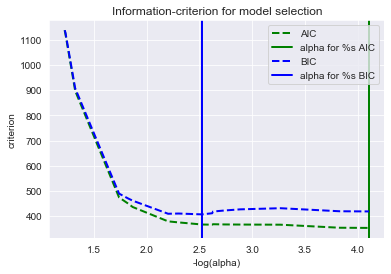

In [73]:
AIC_3, BIC_3 = ic_all(X_2, y_train)

In [74]:
df_3 = model_DataFrame("RFE", X_2, y_train , X_3_test, y_test, lasso_alpha=AIC_3, ridge_alpha=BIC_3)
# df_3

### Interactions Model Validation

In [75]:
X_inter = data_combined.copy()
X_cols = list(X_inter.columns)
X_inter_test = data_combined_test[X_cols]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


Alpha_AIC 0.0
Alpha_BIC 0.0053581607404368445


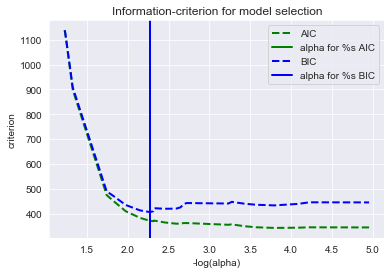

In [100]:
AIC_4, BIC_4 = ic_all(X_inter, y_train)

In [101]:
df_4 = model_DataFrame("Interaction", X_inter, y_train , X_inter_test, y_test, lasso_alpha=BIC_4, ridge_alpha=BIC_4)
# df_4

### Interactions RFE Model Validation

In [102]:
X_inter_rfe = df_inter_reduced.copy()
X_cols = list(X_inter_rfe.columns)
X_inter_rfe_test = data_combined_test[X_cols]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


Alpha_AIC 0.0
Alpha_BIC 0.005429375135247712


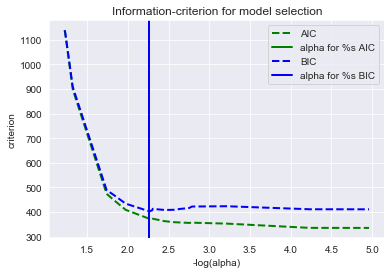

In [103]:
AIC_5, BIC_5 = ic_all(X_inter_rfe, y_train)

In [104]:
df_5 = model_DataFrame("Inter_RFE", X_inter_rfe, y_train , X_inter_rfe_test, y_test, lasso_alpha=BIC_5, ridge_alpha=BIC_5)
# df_5

## Compare Models



In [105]:
df_all = pd.concat([df_1,df_2,df_3,df_4,df_5], axis=1)
df_all

model_name,Baseline,Initial_Drop,RFE,Interaction,Inter_RFE
lasso_alpha,0.002825,0.002264,0.000078,0.005358,0.005429
lasso_r2_train,0.920000,0.750000,0.713000,0.731000,0.730000
lasso_r2_test,0.873000,0.708000,0.695000,0.701000,0.701000
lasso_mse_train,0.734000,2.305000,2.648000,2.481000,2.490000
lasso_mse_test,1.036000,2.388000,2.498000,2.445000,2.452000
ridge_alpha,0.007152,0.005096,0.002977,0.005358,0.005429
ridge_r2_train,0.922000,0.752000,0.713000,0.735000,0.734000
ridge_r2_test,0.877000,0.708000,0.695000,0.096000,0.119000
ridge_mse_train,0.723000,2.293000,2.648000,2.442000,2.457000
ridge_mse_test,1.010000,2.394000,2.499000,7.403000,7.216000


## Optimizing Alpha

In [82]:
def alpha_selection(X_train_all, y_train, X_test_all, y_test):

    train_mse = []
    test_mse = []
    alphas = []

    for alpha in np.linspace(0, 200, num=50):
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train_all, y_train)

        train_preds = lasso.predict(X_train_all)
        train_mse.append(mean_squared_error(y_train, train_preds))

        test_preds = lasso.predict(X_test_all)
        test_mse.append(mean_squared_error(y_test, test_preds))

        alphas.append(alpha)
    
    return alphas, train_mse, test_mse

In [83]:
def plot_alpha_selection(X_train_all, y_train, X_test_all, y_test):
    
    alphas, train_mse, test_mse = alpha_selection(X_train_all, y_train, X_test_all, y_test)
    
    fig, ax = plt.subplots()
    ax.plot(alphas, train_mse, label='Train')
    ax.plot(alphas, test_mse, label='Test')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('MSE')

    # np.argmin() returns the index of the minimum value in a list
    optimal_alpha = alphas[np.argmin(test_mse)]

    # Add a vertical line where the test MSE is minimized
    ax.axvline(optimal_alpha, color='black', linestyle='--')
    ax.legend();

    print(f'Optimal Alpha Value: {int(optimal_alpha)}')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409.9537375430016, tolerance: 1.0502947366859894
  positive)


Optimal Alpha Value: 0


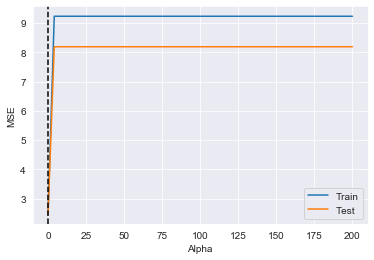

In [84]:
plot_alpha_selection(X_inter_rfe, y_train , X_inter_rfe_test, y_test)

## Lasso paths

In [85]:
from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path

In [86]:
def comp_lasso_paths(X,y, eps=5e-3):
    
    eps = eps  # path length (Smaller = Longer)

    # Compute paths
    print("Computing regularization path using the lasso...")
    alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
    
    print("Computing regularization path using the positive lasso...")
    alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
        X, y, eps, positive=True, fit_intercept=False)
    print("Computing regularization path using the elastic net...")
    alphas_enet, coefs_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

    print("Computing regularization path using the positive elastic net...")
    alphas_positive_enet, coefs_positive_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)
    
    # Display results

    plt.figure(1)
    colors = cycle(['b', 'r', 'g', 'c', 'k'])
    neg_log_alphas_lasso = -np.log10(alphas_lasso)
    neg_log_alphas_enet = -np.log10(alphas_enet)
    for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and Elastic-Net Paths')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
    plt.axis('tight')


    plt.figure(2)
    neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
    for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and positive Lasso')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
    plt.axis('tight')


    plt.figure(3)
    neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
    for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
        l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
        l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Elastic-Net and positive Elastic-Net')
    plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
               loc='lower left')
    plt.axis('tight')
    plt.show()
    
    return None

In [87]:
comp_lasso_paths(X_final, y_train, eps=5e-3)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...


ValueError: positive=True is not allowed for multi-output (y.ndim != 1)

In [ ]:
x

# ZZ -  Feature ranking to recursive eliminate features

In [ ]:
# df_feat_rank = pd.concat([y,X_1], axis=1)
# df_feat_rank.head()

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=20) # 20 most important features
selector = selector.fit(X_1, y)
estimators = selector.estimator_

In [ ]:
# print(selector.support_ )
# print(selector.ranking_)
# print(estimators.coef_)
# print(estimators.intercept_)
print(selector.classes_)

In [ ]:
# dir(selector)

In [ ]:
X_cols = list(X_1.columns)
X_best = []
i=0
for x in selector.support_:
    if x == True:
        X_best.append((X_cols[i], selector.ranking_[i]))
    i+=1

In [ ]:
# X_best

In [ ]:
sell = list(zip(X_cols, estimators.coef_, selector.ranking_, selector.support_))
df_selection = pd.DataFrame(sell, columns=['X_cols', 'coef','ranking', 'support'])
df_selection.sort_values(by=['ranking'], inplace=True)
df_selection.head(30)

In [ ]:
corr = X_1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           center=True)